<h1>Visualizando Filtros Convolucionales con TF</h1>


In [5]:
import imageio as imageio
import tensorflow as tf

from skimage.transform import  resize
from scipy.misc import imsave
import matplotlib.pyplot as plt
import numpy as np

In [7]:
file = "images/z0.jpeg"

image = resize(imageio.imread(file).astype(np.float32), [224,224])
plt.imshow(image)
plt.show()
print(image.shape)

/Users/murillocjr/anaconda3/envs/py36/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/murillocjr/anaconda3/envs/py36/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


ValueError: Images of type float must be between -1 and 1.

In [623]:
filters = np.zeros([7,7,1,6])


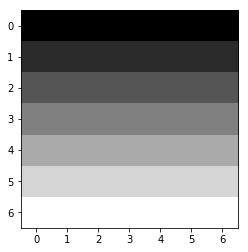

In [624]:

filters[0,:,0,0] = -3
filters[1,:,0,0] = -2
filters[2,:,0,0] = -1
filters[3,:,0,0] = 0
filters[4,:,0,0] = 1
filters[5,:,0,0] = 2
filters[6,:,0,0] = 3

plt.imshow(filters[:,:,:,0].reshape(7,7), cmap='gray')
plt.show()

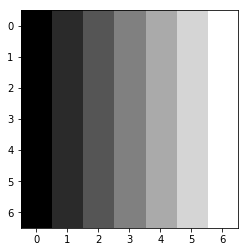

In [625]:
filters[:,0,0,1] = -3
filters[:,1,0,1] = -2
filters[:,2,0,1] = -1
filters[:,3,0,1] = 0
filters[:,4,0,1] = 1
filters[:,5,0,1] = 2
filters[:,6,0,1] = 3
plt.imshow(filters[:,:,:,1].reshape(7,7), cmap='gray')
plt.show()

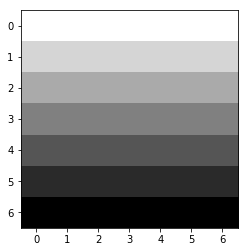

In [626]:
filters[0,:,0,2] = 3
filters[1,:,0,2] = 2
filters[2,:,0,2] = 1
filters[3,:,0,2] = 0
filters[4,:,0,2] = -1
filters[5,:,0,2] = -2
filters[6,:,0,2] = -3

plt.imshow(filters[:,:,:,2].reshape(7,7), cmap='gray')
plt.show()

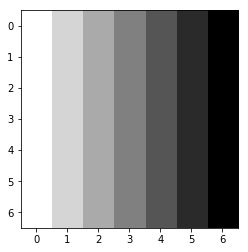

In [627]:
filters[:,0,0,3] = 3
filters[:,1,0,3] = 2
filters[:,2,0,3] = 1
filters[:,3,0,3] = 0
filters[:,4,0,3] = -1
filters[:,5,0,3] = -2
filters[:,6,0,3] = -3

plt.imshow(filters[:,:,:,3].reshape(7,7), cmap='gray')
plt.show()




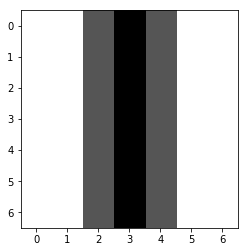

In [628]:
filters[:,0,0,4] = 2
filters[:,1,0,4] = 2
filters[:,2,0,4] = -2
filters[:,3,0,4] = -4
filters[:,4,0,4] = -2
filters[:,5,0,4] = 2
filters[:,6,0,4] = 2

plt.imshow(filters[:,:,:,4].reshape(7,7), cmap='gray')
plt.show()

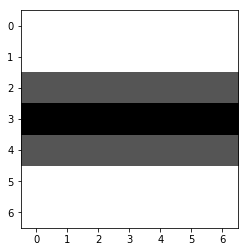

In [629]:
filters[0,:,0,5] = 2
filters[1,:,0,5] = 2
filters[2,:,0,5] = -2
filters[3,:,0,5] = -4
filters[4,:,0,5] = -2
filters[5,:,0,5] = 2
filters[6,:,0,5] = 2

plt.imshow(filters[:,:,:,5].reshape(7,7), cmap='gray')
plt.show()

In [630]:
print(filters.shape)

(7, 7, 1, 6)


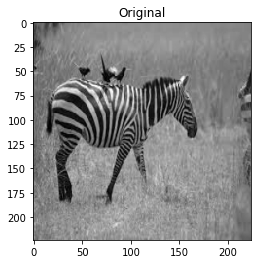

(224, 224)


In [631]:
gray = np.mean(image,-1)

X = tf.placeholder(tf.float32, shape=(None, 224, 224, 1))

conv = tf.nn.conv2d(X, filters, [1,1,1,1], padding="SAME")

filterSession = tf.Session()
filterSession.run(tf.global_variables_initializer())

filteredImage = filterSession.run(conv, feed_dict={X: gray.reshape(1,224,224,1)})
tf.reset_default_graph()

plt.imshow(gray, cmap='gray')
plt.title('Original')
plt.show()
print(gray.shape)


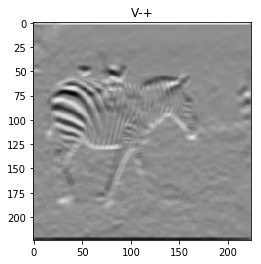

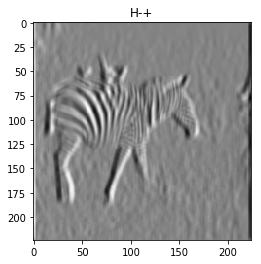

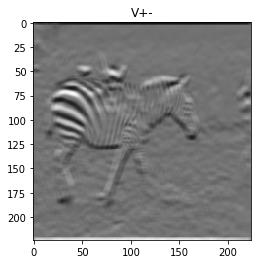

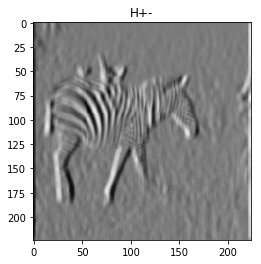

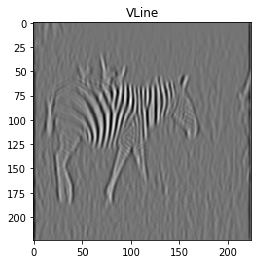

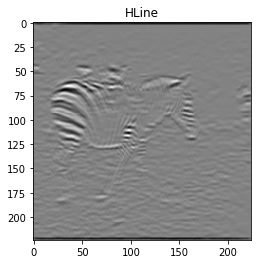

In [632]:
labels = ['V-+', 'H-+', 'V+-', 'H+-', 'VLine', 'HLine']

for i in range(6):
    plt.title(labels[i])
    plt.imshow(filteredImage[:,:,:,i].reshape(224,224),cmap = 'gray')
    plt.show()

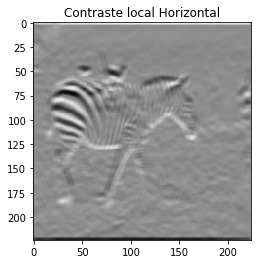

(224, 224)


In [633]:
image_horizontal = filteredImage[:,:,:,0].reshape(224,224)

plt.title("Contraste local Horizontal")
plt.imshow(image_horizontal,cmap = 'gray')
plt.show()

print(image_horizontal.shape)

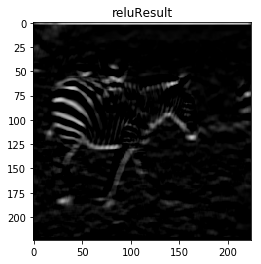

(224, 224)
[[1809.3333  2418.3333  3006.3335  ... 4572.      3806.      3040.     ]
 [1384.      1877.6667  2300.3335  ... 3810.      3171.6665  2533.3333 ]
 [ 689.33325  958.6666  1110.6666  ... 2286.      1902.9999  1520.     ]
 ...
 [   0.         0.         0.      ...    0.         0.         0.     ]
 [   0.         0.         0.      ...    0.         0.         0.     ]
 [   0.         0.         0.      ...    0.         0.         0.     ]]


In [634]:
X = tf.placeholder(tf.float32, shape=(224, 224))

relu_1 = tf.nn.relu(X)

reluSession = tf.Session()
reluSession.run(tf.global_variables_initializer())

reluResult = reluSession.run(relu_1, feed_dict={X: image_horizontal})
tf.reset_default_graph()

plt.title("reluResult")
plt.imshow(reluResult,cmap = 'gray')
plt.show()
print(reluResult.shape)
print(reluResult)

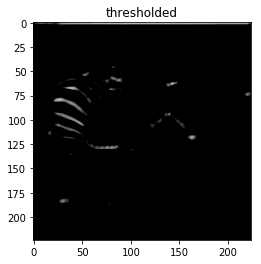

(224, 224)
[[2000.     2418.3333 3006.3335 ... 4572.     3806.     3040.    ]
 [2000.     2000.     2300.3335 ... 3810.     3171.6665 2533.3333]
 [2000.     2000.     2000.     ... 2286.     2000.     2000.    ]
 ...
 [2000.     2000.     2000.     ... 2000.     2000.     2000.    ]
 [2000.     2000.     2000.     ... 2000.     2000.     2000.    ]
 [2000.     2000.     2000.     ... 2000.     2000.     2000.    ]]


In [635]:
X = tf.placeholder(tf.float32, shape=(224, 224))

threshold_1 = tf.clip_by_value(
    X,
    2000,
    600000
)
thSession = tf.Session()
thSession.run(tf.global_variables_initializer())

thresholded = thSession.run(threshold_1, feed_dict={X: reluResult})
tf.reset_default_graph()

plt.title("thresholded")
plt.imshow(thresholded,cmap = 'gray')
plt.show()

print(thresholded.shape)
print(thresholded)




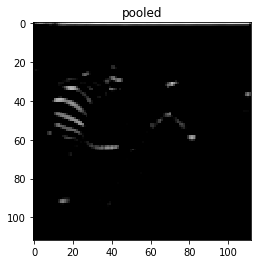

In [636]:
X = tf.placeholder(tf.float32, shape=(None, 224, 224, 1))

pool1_1 = tf.nn.max_pool(X,
                             ksize=[1, 2, 2, 1],
                             strides=[1, 2, 2, 1],
                             padding='SAME')

test = tf.Session()
test.run(tf.global_variables_initializer())

pooledImage = test.run(pool1_1, feed_dict={X: thresholded.reshape(1,224,224,1)})
tf.reset_default_graph()

#print(pooledImage)
plt.title("pooled")
plt.imshow(pooledImage[:,:,:,0].reshape(112,112),cmap = 'gray')
plt.show()